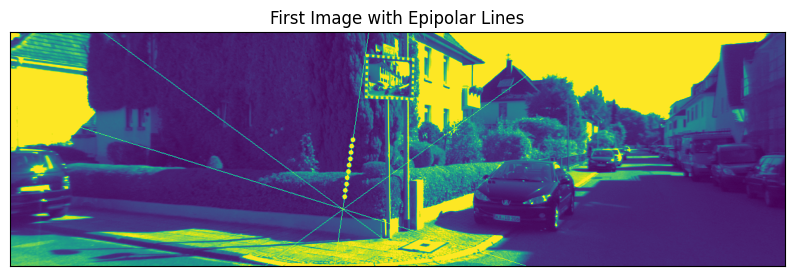

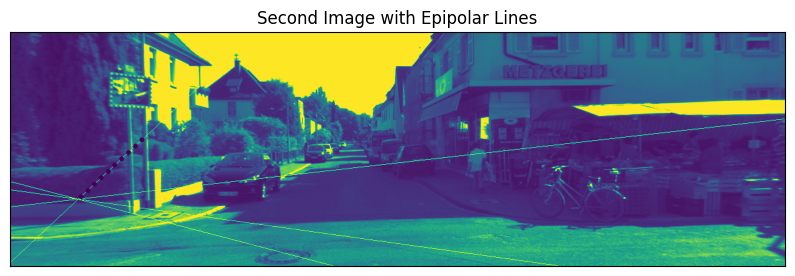

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
first_image_path = '/content/drive/MyDrive/CV_Assignments/Question 2 and 3 Images/000023.png'
second_image_path = '/content/drive/MyDrive/CV_Assignments/Question 2 and 3 Images/000000.png'
first_image = cv2.imread(first_image_path, cv2.IMREAD_GRAYSCALE)
second_image = cv2.imread(second_image_path, cv2.IMREAD_GRAYSCALE)

# Define the fundamental matrix
fundamental_matrix = np.array([
    [3.34638533e-07,  7.58547151e-06, -2.04147752e-03],
    [-5.83765868e-06,  1.36498636e-06, 2.67566877e-04],
    [1.45892349e-03, -4.37648316e-03,  1.00000000e+00]
])

# Standardize the fundamental matrix
norm_fundamental_matrix = fundamental_matrix / np.linalg.norm(fundamental_matrix)

# Methods to calculate the epipolar line for a given point and fundamental matrix
def calculate_epipolar_line(pnt, f_matrix):
    return np.dot(f_matrix, np.array([pnt[0], pnt[1], 1]))

# Obtain the x-coordinate on the epipolar line for a given y-coordinate
def find_matching_point(epi_line, y_val):
    a, b, c = epi_line
    if a == 0:
        print("Error: Calculation of x not possible for horizontal or invalid line equations.")
        return None
    x_val = (-b * y_val - c) / a
    return int(x_val), y_val

# Set of points to be analyzed
target_points = [(100, 100), (200, 200), (300, 300), (400, 400)]

# Process each point to draw epipolar lines and identify corresponding points
for target_point in target_points:
    epi_line_first_img = calculate_epipolar_line(target_point, norm_fundamental_matrix)
    epi_line_second_img = calculate_epipolar_line(target_point, norm_fundamental_matrix.T)

    # Drawing on the first image
    start_x1, start_y1 = 0, -epi_line_first_img[2] / epi_line_first_img[1]
    end_x1, end_y1 = first_image.shape[1], -(epi_line_first_img[0] * first_image.shape[1] + epi_line_first_img[2]) / epi_line_first_img[1]
    cv2.line(first_image, (int(start_x1), int(start_y1)), (int(end_x1), int(end_y1)), (255, 0, 0), 1)

    # Drawing on the second image
    start_x2, start_y2 = 0, -epi_line_second_img[2] / epi_line_second_img[1]
    end_x2, end_y2 = second_image.shape[1], -(epi_line_second_img[0] * second_image.shape[1] + epi_line_second_img[2]) / epi_line_second_img[1]
    cv2.line(second_image, (int(start_x2), int(start_y2)), (int(end_x2), int(end_y2)), (255, 0, 0), 1)

    # Mark corresponding points on images for specific target points
    if target_point == (100, 100):
        for y in range(170, 270, 10):
            match_point = find_matching_point(epi_line_first_img, y)
            if match_point:
                cv2.circle(first_image, match_point, 4, (255,0,0), -1)
    if target_point == (400, 400):
        for y in range(170, 270, 10):
            match_point = find_matching_point(epi_line_second_img, y)
            if match_point:
                cv2.circle(second_image, match_point, 4, (0,255,0), -1)

# Visualization for First Image with Epipolar Lines
plt.figure(figsize=(10, 10))  # Adjust the size as needed
plt.imshow(first_image)
plt.title('First Image with Epipolar Lines')
plt.xticks([]), plt.yticks([])

plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(second_image)
plt.title('Second Image with Epipolar Lines')
plt.xticks([]), plt.yticks([])


plt.show()


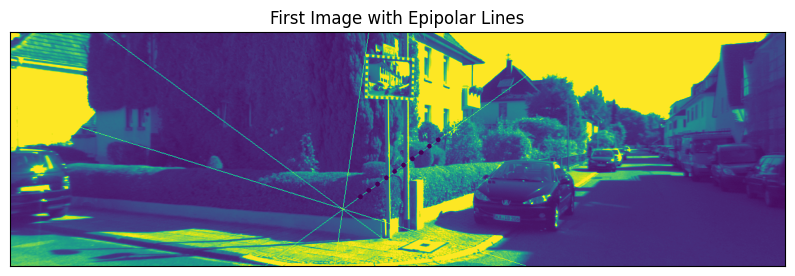

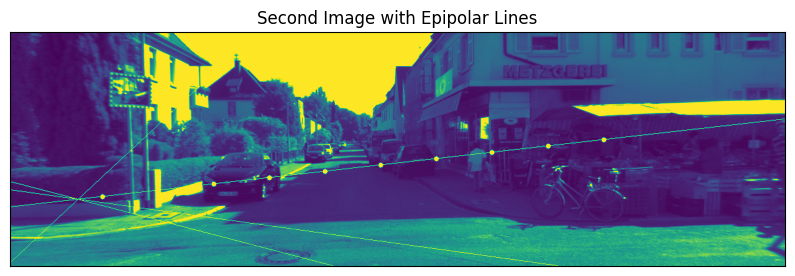

In [12]:
# Loading the grayscale images
gray_image_one = cv2.imread('/content/drive/MyDrive/CV_Assignments/Question 2 and 3 Images/000023.png', cv2.IMREAD_GRAYSCALE)
gray_image_two = cv2.imread('/content/drive/MyDrive/CV_Assignments/Question 2 and 3 Images/000000.png', cv2.IMREAD_GRAYSCALE)

# Iterating over predefined points to calculate and draw epipolar lines and points
for selected_point in target_points:
    # Calculate epipolar lines for the point in both images
    epipolar_line_img_one = calculate_epipolar_line(selected_point, norm_fundamental_matrix)
    epipolar_line_img_two = calculate_epipolar_line(selected_point, norm_fundamental_matrix.T)

    # Drawing epipolar lines on the first image
    start_point_x_one, start_point_y_one = 0, -epipolar_line_img_one[2] / epipolar_line_img_one[1]
    end_point_x_one, end_point_y_one = gray_image_one.shape[1], -(epipolar_line_img_one[0] * gray_image_one.shape[1] + epipolar_line_img_one[2]) / epipolar_line_img_one[1]
    cv2.line(gray_image_one, (int(start_point_x_one), int(start_point_y_one)), (int(end_point_x_one), int(end_point_y_one)), (255, 0, 0), 1)

    # Drawing epipolar lines on the second image
    start_point_x_two, start_point_y_two = 0, -epipolar_line_img_two[2] / epipolar_line_img_two[1]
    end_point_x_two, end_point_y_two = gray_image_two.shape[1], -(epipolar_line_img_two[0] * gray_image_two.shape[1] + epipolar_line_img_two[2]) / epipolar_line_img_two[1]
    cv2.line(gray_image_two, (int(start_point_x_two), int(start_point_y_two)), (int(end_point_x_two), int(end_point_y_two)), (255, 0, 0), 1)

    # Identifying and drawing corresponding points for specific selected points
    if selected_point == (300, 300):
        for y_position in range(170, 270, 10):
            match_point_on_two = find_matching_point(epipolar_line_img_two, y_position)
            if match_point_on_two:
                cv2.circle(gray_image_two, match_point_on_two, 4, (255,0,0), -1)
    if selected_point == (200, 200):
        for y_position in range(170, 270, 10):
            match_point_on_one = find_matching_point(epipolar_line_img_one, y_position)
            if match_point_on_one:
                cv2.circle(gray_image_one, match_point_on_one, 4, (0,255,0), -1)

# Visualization for First Image with Epipolar Lines
plt.figure(figsize=(10, 10))  # Adjust the size as needed
plt.imshow(gray_image_one)
plt.title('First Image with Epipolar Lines')
plt.xticks([]), plt.yticks([])


plt.show()

# Visualization for Second Image with Epipolar Lines
plt.figure(figsize=(10, 10))
plt.imshow(gray_image_two)
plt.title('Second Image with Epipolar Lines')
plt.xticks([]), plt.yticks([])
plt.show()

